### Step 0: Imports and Reading Data

In [378]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [379]:
df = pd.read_csv('../data/csv/US Raw Events.csv')

/var/folders/_6/zcd8685d3_v7l0bntk77ktl40000gn/T/ipykernel_56139/2845333868.py:1: DtypeWarning: Columns (2,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/csv/US Raw Events.csv')


### Step 1: Data Understanding

In [381]:
df.shape

(96655, 77)

In [382]:
df.head(5)

,EVENT_ID,EVENT_NAME,EVENT_NOTES,EVENT_INFO,EVENT_STATUS,EVENT_START_DATETIME,EVENT_END_DATETIME,EVENT_START_LOCAL_DATE,EVENT_START_LOCAL_TIME,ONSALE_START_DATETIME,ONSALE_END_DATETIME,CLASSIFICATION_SEGMENT,CLASSIFICATION_GENRE,CLASSIFICATION_SUB_GENRE,EVENT_IMAGE_URL,MIN_PRICE,MAX_PRICE,CURRENCY,ATTRACTION_NAME,ATTRACTION_ID,ATTRACTION_IMAGE_URL,VENUE_NAME,VENUE_ID,VENUE_STREET,VENUE_CITY,VENUE_STATE_CODE,VENUE_COUNTRY_CODE,VENUE_LATITUDE,VENUE_LONGITUDE,VENUE_ZIP_CODE,VENUE_TIMEZONE,ATTRACTION_URL,VENUE_URL,PRIMARY_EVENT_URL,RESALE_EVENT_URL,PRESALE_NAME,PRESALE_DATETIME_RANGE,LEGACY_EVENT_ID,LEGACY_VENUE_ID,LEGACY_ATTRACTION_ID,PRESALE_NAME.1,PRESALE_DESCRIPTION,PRESALE_START_DATETIME,PRESALE_END_DATETIME,SOURCE,CLASSIFICATION_TYPE,CLASSIFICATION_SUB_TYPE,PROMOTER_ID,PROMOTER_NAME,CLASSIFICATION_SEGMENT_ID,CLASSIFICATION_GENRE_ID,CLASSIFICATION_SUB_GENRE_ID,CLASSIFICATION_TYPE_ID,CLASSIFICATION_SUB_TYPE_ID,ATTRACTION_CLASSIFICATION_SEGMENT_ID,ATTRACTION_CLASSIFICATION_SEGMENT,ATTRACTION_CLASSIFICATION_GENRE_ID,ATTRACTION_CLASSIFICATION_GENRE,ATTRACTION_CLASSIFICATION_SUB_GENRE_ID,ATTRACTION_CLASSIFICATION_SUB_GENRE,ATTRACTION_CLASSIFICATION_TYPE_ID,ATTRACTION_CLASSIFICATION_TYPE,ATTRACTION_CLASSIFICATION_SUB_TYPE_ID,ATTRACTION_CLASSIFICATION_SUB_TYPE,MIN_PRICE_WITH_FEES,MAX_PRICE_WITH_FEES,TRANSACTABLE,HOT_EVENT,ACCESSIBLE_SEATING_DETAIL,ADA_PHONE,ADA_CUSTOM_COPY,ADA_HOURS,ACCESSIBILITY_INFO,API_ONSALE_START_DATETIME,PLEASE_NOTE,IMPORTANT_INFORMATION,EVENT_END_LOCAL_DATE
0,rZ7HnEZ1AfF6aK,Tonight at the Improv!,NaN,DO NOT PURCHASE TICKETS FROM ANYONE OR ANY OTH...,onsale,2025-03-02T05:30:00Z,NaN,2025-03-01,21:30,2025-01-20T21:00:00Z,2025-03-02T06:00:00Z,Undefined,NaN,NaN,https://i.ticketweb.com/i/00/12/86/60/03_Edp.j...,29.34,29.34,USD,NaN,NaN,NaN,Hollywood Improv (The Main Room),rZ7HnEZ178sj4,8162 Melrose Avenue,Hollywood,CA,US,34.083418,-118.366556,90046,America/Los_Angeles,NaN,https://www.ticketweb.com/venue/hollywood-impr...,https://www.ticketweb.com/event/tonight-at-the...,NaN,NaN,NaN,rZ7HnEZ1AfF6aK,NaN,NaN,NaN,NaN,NaN,NaN,ticketweb,Undefined,Undefined,NaN,NaN,KZFzniwnSyZfZ7v7nl,NaN,NaN,KZAyXgnZfZ7v7nI,KZFzBErXgnZfZ7v7lJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,2025-01-20T22:00:00Z,This event is 21 and over. Any ticket holder u...,NaN,NaN
1,rZ7HnEZ1AfF6aN,Tonight at the Improv!,NaN,DO NOT PURCHASE TICKETS FROM ANYONE OR ANY OTH...,onsale,2025-03-09T05:30:00Z,NaN,2025-03-08,21:30,2025-01-20T21:00:00Z,2025-03-09T06:00:00Z,Undefined,NaN,NaN,https://i.ticketweb.com/i/00/12/86/60/03_Edp.j...,29.34,29.34,USD,NaN,NaN,NaN,Hollywood Improv (The Main Room),rZ7HnEZ178sj4,8162 Melrose Avenue,Hollywood,CA,US,34.083418,-118.366556,90046,America/Los_Angeles,NaN,https://www.ticketweb.com/venue/hollywood-impr...,https://www.ticketweb.com/event/tonight-at-the...,NaN,NaN,NaN,rZ7HnEZ1AfF6aN,NaN,NaN,NaN,NaN,NaN,NaN,ticketweb,Undefined,Undefined,NaN,NaN,KZFzniwnSyZfZ7v7nl,NaN,NaN,KZAyXgnZfZ7v7nI,KZFzBErXgnZfZ7v7lJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,2025-01-20T22:00:00Z,This event is 21 and over. Any ticket holder u...,NaN,NaN
2,rZ7HnEZ1AfF6aS,Tonight at the Improv!,NaN,DO NOT PURCHASE TICKETS FROM ANYONE OR ANY OTH...,onsale,2025-03-30T02:00:00Z,NaN,2025-03-29,19:00,2025-01-20T21:00:00Z,2025-03-30T02:30:00Z,Undefined,NaN,NaN,https://i.ticketweb.com/i/00/12/86/60/03_Edp.j...,29.34,29.34,USD,NaN,NaN,NaN,Hollywood Improv (The Main Room),rZ7HnEZ178sj4,8162 Melrose Avenue,Hollywood,CA,US,34.083418,-118.366556,90046,America/Los_Angeles,NaN,https://www.ticketweb.com/venue/hollywood-impr...,https://www.ticketweb.com/event/tonight-at-the...,NaN,NaN,NaN,rZ7HnEZ1AfF6aS,NaN,NaN,NaN,NaN,NaN,NaN,ticketweb,Undefined,Undefined,NaN,NaN,KZFzniwnSyZfZ7v7nl,NaN,NaN,KZAyXgnZfZ7v7nI,KZFzBErXgnZfZ7v7lJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,2025-01-20T22:00:00Z,This event is 21 and over. Any ticket holder u...,NaN,NaN
3,rZ7HnEZ1AfF6ad,Tonight at 

In [383]:
df.columns

Index(['EVENT_ID', 'EVENT_NAME', 'EVENT_NOTES', 'EVENT_INFO', 'EVENT_STATUS',
       'EVENT_START_DATETIME', 'EVENT_END_DATETIME', 'EVENT_START_LOCAL_DATE',
       'EVENT_START_LOCAL_TIME', 'ONSALE_START_DATETIME',
       'ONSALE_END_DATETIME', 'CLASSIFICATION_SEGMENT', 'CLASSIFICATION_GENRE',
       'CLASSIFICATION_SUB_GENRE', 'EVENT_IMAGE_URL', 'MIN_PRICE', 'MAX_PRICE',
       'CURRENCY', 'ATTRACTION_NAME', 'ATTRACTION_ID', 'ATTRACTION_IMAGE_URL',
       'VENUE_NAME', 'VENUE_ID', 'VENUE_STREET', 'VENUE_CITY',
       'VENUE_STATE_CODE', 'VENUE_COUNTRY_CODE', 'VENUE_LATITUDE',
       'VENUE_LONGITUDE', 'VENUE_ZIP_CODE', 'VENUE_TIMEZONE', 'ATTRACTION_URL',
       'VENUE_URL', 'PRIMARY_EVENT_URL', 'RESALE_EVENT_URL', 'PRESALE_NAME',
       'PRESALE_DATETIME_RANGE', 'LEGACY_EVENT_ID', 'LEGACY_VENUE_ID',
       'LEGACY_ATTRACTION_ID', 'PRESALE_NAME.1', 'PRESALE_DESCRIPTION',
       'PRESALE_START_DATETIME', 'PRESALE_END_DATETIME', 'SOURCE',
       'CLASSIFICATION_TYPE', 'CLASSIFICATION_SUB

In [384]:
df.dtypes

EVENT_ID                                   object
EVENT_NAME                                 object
EVENT_NOTES                                object
EVENT_INFO                                 object
EVENT_STATUS                               object
EVENT_START_DATETIME                       object
EVENT_END_DATETIME                         object
EVENT_START_LOCAL_DATE                     object
EVENT_START_LOCAL_TIME                     object
ONSALE_START_DATETIME                      object
ONSALE_END_DATETIME                        object
CLASSIFICATION_SEGMENT                     object
CLASSIFICATION_GENRE                       object
CLASSIFICATION_SUB_GENRE                   object
EVENT_IMAGE_URL                            object
MIN_PRICE                                 float64
MAX_PRICE                                 float64
CURRENCY                                   object
ATTRACTION_NAME                            object
ATTRACTION_ID                              object


In [385]:
df.describe()

,MIN_PRICE,MAX_PRICE,VENUE_LATITUDE,VENUE_LONGITUDE,RESALE_EVENT_URL,PRESALE_NAME,PRESALE_DATETIME_RANGE,LEGACY_VENUE_ID,MIN_PRICE_WITH_FEES,MAX_PRICE_WITH_FEES
count,57192.000000,57192.000000,96589.000000,96589.000000,0.0,0.0,0.0,64392.000000,0.0,0.0
mean,44.103389,137.786942,37.591438,-94.577368,NaN,NaN,NaN,217224.224422,NaN,NaN
std,40.744637,417.955852,4.835431,19.346673,NaN,NaN,NaN,159759.121437,NaN,NaN
min,0.000000,0.000000,-87.713192,-159.371111,NaN,NaN,NaN,6.000000,NaN,NaN
25%,24.500000,35.250000,35.820643,-115.171478,NaN,NaN,NaN,57759.000000,NaN,NaN
50%,38.160000,75.000000,37.795508,-87.953513,NaN,NaN,NaN,189520.000000,NaN,NaN
75%,55.000000,129.000000,40.759300,-75.599090,NaN,NaN,NaN,376840.000000,NaN,NaN
max,3216.000000,21000.000000,64.503700,122.269633,NaN,NaN,NaN,491609.000000,NaN,NaN


In [386]:
# remove unneeded columns 

df = df[['EVENT_ID', 'EVENT_NAME', #'EVENT_NOTES', 'EVENT_INFO', 'EVENT_STATUS',
       #'EVENT_START_DATETIME', 'EVENT_END_DATETIME', 'EVENT_START_LOCAL_DATE',
       #'EVENT_START_LOCAL_TIME', 
       #'ONSALE_START_DATETIME',
       #'ONSALE_END_DATETIME', 
        'CLASSIFICATION_SEGMENT', # 'CLASSIFICATION_GENRE',
       #'CLASSIFICATION_SUB_GENRE', #'EVENT_IMAGE_URL', 
       #'MIN_PRICE', 
         'MAX_PRICE']].copy()
       #,'VENUE_CITY', 'CURRENCY', 'ATTRACTION_NAME', 'ATTRACTION_ID', 'ATTRACTION_IMAGE_URL',
       #'VENUE_NAME', 'VENUE_ID', 'VENUE_STREET', 
       #'VENUE_STATE_CODE', #'VENUE_COUNTRY_CODE', 
       #'VENUE_LATITUDE',
       #'VENUE_LONGITUDE', 'VENUE_ZIP_CODE', 'VENUE_TIMEZONE', #'ATTRACTION_URL',
       #'VENUE_URL', 'PRIMARY_EVENT_URL', 'RESALE_EVENT_URL', 'PRESALE_NAME',
       #'PRESALE_DATETIME_RANGE', 'LEGACY_EVENT_ID', 'LEGACY_VENUE_ID',
       #'LEGACY_ATTRACTION_ID', 'PRESALE_NAME.1', 'PRESALE_DESCRIPTION',
       #'PRESALE_START_DATETIME', 'PRESALE_END_DATETIME', 'SOURCE',
       #'CLASSIFICATION_TYPE', 'CLASSIFICATION_SUB_TYPE', 'PROMOTER_ID',
       #'PROMOTER_NAME', #'CLASSIFICATION_SEGMENT_ID', 'CLASSIFICATION_GENRE_ID',
       #'CLASSIFICATION_SUB_GENRE_ID', 'CLASSIFICATION_TYPE_ID',
      # 'CLASSIFICATION_SUB_TYPE_ID', 'ATTRACTION_CLASSIFICATION_SEGMENT_ID',
       #'ATTRACTION_CLASSIFICATION_SEGMENT',
       #'ATTRACTION_CLASSIFICATION_GENRE_ID', 'ATTRACTION_CLASSIFICATION_GENRE',
       #'ATTRACTION_CLASSIFICATION_SUB_GENRE_ID',
       #'ATTRACTION_CLASSIFICATION_SUB_GENRE',
      # 'ATTRACTION_CLASSIFICATION_TYPE_ID', 'ATTRACTION_CLASSIFICATION_TYPE',
       #'ATTRACTION_CLASSIFICATION_SUB_TYPE_ID',
       #'ATTRACTION_CLASSIFICATION_SUB_TYPE', 'MIN_PRICE_WITH_FEES',
       #'MAX_PRICE_WITH_FEES', 
       #'TRANSACTABLE', 'HOT_EVENT',
       #'ACCESSIBLE_SEATING_DETAIL', 'ADA_PHONE', 'ADA_CUSTOM_COPY',
       #'ADA_HOURS', 'ACCESSIBILITY_INFO', 'API_ONSALE_START_DATETIME',
       #'PLEASE_NOTE', 'IMPORTANT_INFORMATION', 'EVENT_END_LOCAL_DATE'

df.head(5)

,EVENT_ID,EVENT_NAME,CLASSIFICATION_SEGMENT,MAX_PRICE
0,rZ7HnEZ1AfF6aK,Tonight at the Improv!,Undefined,29.34
1,rZ7HnEZ1AfF6aN,Tonight at the Improv!,Undefined,29.34
2,rZ7HnEZ1AfF6aS,Tonight at the Improv!,Undefined,29.34
3,rZ7HnEZ1AfF6ad,Tonight at the Improv!,Undefined,19.04
4,G5ezZb8MgIPuh,"Cirque du Soleil : ""O""",Arts & Theatre,276.14


In [387]:
# rename columns
df = df.rename(columns = {'EVENT_ID':'Event_ID', 'EVENT_NAME':'Event_Name', 'CLASSIFICATION_SEGMENT':'Classification', 
                     'CLASSIFICATION_GENRE':'Genre', 'CLASSIFICATION_SUB_GENRE':'Sub_Genre',
                     'MIN_PRICE':'Min_Price','MAX_PRICE':'Max_Price'})

df.head(5)

,Event_ID,Event_Name,Classification,Max_Price
0,rZ7HnEZ1AfF6aK,Tonight at the Improv!,Undefined,29.34
1,rZ7HnEZ1AfF6aN,Tonight at the Improv!,Undefined,29.34
2,rZ7HnEZ1AfF6aS,Tonight at the Improv!,Undefined,29.34
3,rZ7HnEZ1AfF6ad,Tonight at the Improv!,Undefined,19.04
4,G5ezZb8MgIPuh,"Cirque du Soleil : ""O""",Arts & Theatre,276.14


In [436]:
df.isna().sum()
df = df.dropna()
df = df[df.Classification != 'Undefined']
df = df[df.Max_Price != 0.00]
df.head()


,Event_ID,Event_Name,Classification,Max_Price
4,G5ezZb8MgIPuh,"Cirque du Soleil : ""O""",Arts & Theatre,276.14
5,1avjZbx8ouIZd271,The Mentalist,Arts & Theatre,59.98
6,vv1keZv-4YGA1U7Bv,Gutfeld Live '25 Featuring Greg Gutfeld & spec...,Arts & Theatre,89.50
7,k7vGFb8zt7yQJ,Irish Celebration Starring Andy Cooney,Music,79.50
8,15vjZbx8KayCZ,The Mentalist,Arts & Theatre,59.98


In [438]:
# check for duplicates

df.loc[df.duplicated()]


,Event_ID,Event_Name,Classification,Max_Price


### Step 3: Max Price and Classification Analysis

In [442]:
df['Max_Price'].value_counts()


Max_Price
25.00       1830
20.00       1265
35.00       1238
43.00        965
15.00        965
30.00        810
79.98        792
75.00        732
45.00        726
95.00        717
138.72       625
10.00        595
50.00        578
40.00        566
69.00        549
55.00        547
88.00        523
65.00        512
100.00       502
79.83        490
261.22       447
60.00        439
248.30       437
276.14       433
203.47       430
49.98        421
28.00        404
125.00       389
18.00        389
54.00        385
91.21        371
150.00       367
22.00        366
59.50        348
29.98        339
102.99       338
101.00       338
219.27       318
99.50        303
85.00        302
70.00        297
82.95        288
69.50        284
99.98        281
108.98       280
89.98        276
159.50       273
129.00       273
137.61       271
81.83        268
59.98        262
80.00        258
67.95        246
200.92       241
96.00        232
79.50        231
139.00       229
114.98       222
55.4

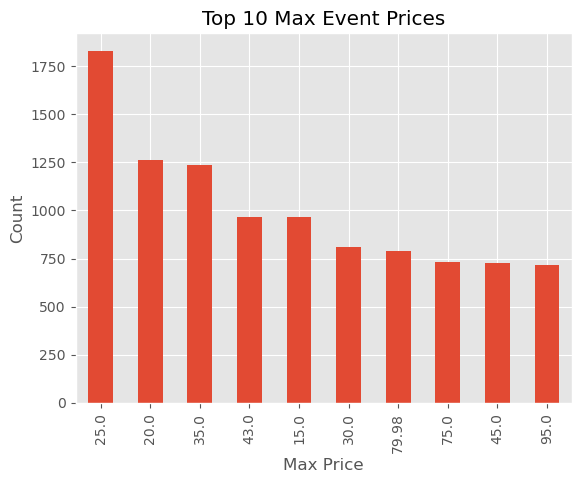

In [444]:
ax = df['Max_Price'].value_counts() \
    .head(10) \
    .plot(kind = 'bar', title = 'Top 10 Max Event Prices')
ax.set_xlabel('Max Price');
ax.set_ylabel('Count');


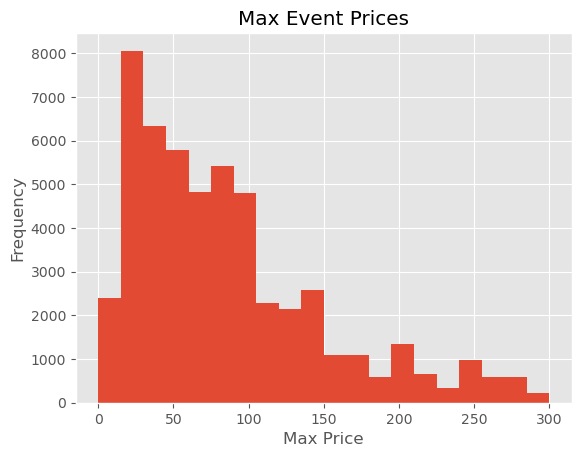

In [478]:
test = df[df.Max_Price < 300]
ax = test.Max_Price.plot(kind = 'hist', bins = 20, title = 'Max Event Prices');
ax.set_xlabel('Max Price');


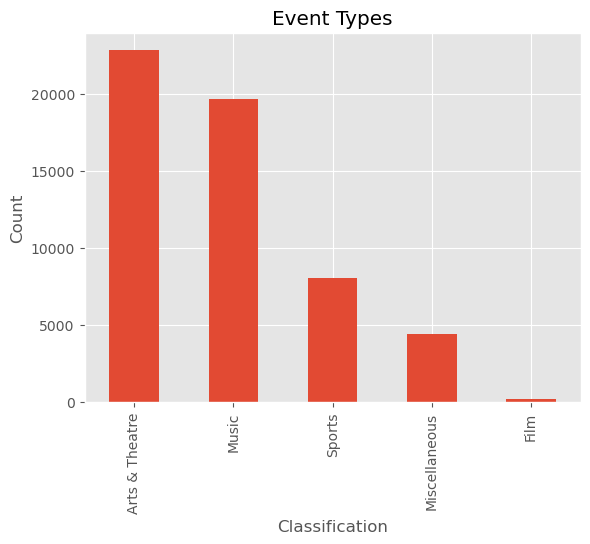

In [486]:
ax = df.Classification.value_counts().plot(kind = 'bar', title = 'Event Types');
ax.set_ylabel('Count');

### Step 4: Future Relationships

In [ ]:
#upcoming events over time and their max prices with color coded by genre

### Step 5: Ask a Question about the Data